<h1 align=right><font size = 2>Author: ivanjdevs</font></h1>
<h1 align=right><font size = 2>Created: 17-May-2024</font></h1>

<h1 align=center><font size = 5>Active football players 2024</font></h1>

In [1]:
# Importamos primero los módulos y librerías a usar (al menos las que creemos que necesitamos de momento):
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

In [2]:
#El archivo que contiene los datos es tipo .csv; leámos dicho archivo y guardemos su contenido en una variable llamada dataf:
dataf=pd.read_csv("football_players.csv")

In [3]:
dataf.head(20)

,nationality,image,name,club,position,height,foot,age
0,https://cdnjs.cloudflare.com/ajax/libs/flag-ic...,85260.png,Kylian Mbappé,Paris Saint-Germain,Attacking Midfielder Left,178,Right,25
1,https://cdnjs.cloudflare.com/ajax/libs/flag-ic...,52690.png,Mohamed Salah,Liverpool,Attacking Midfielder Right,175,Left,31
2,https://cdnjs.cloudflare.com/ajax/libs/flag-ic...,88100.png,Erling Haaland,Manchester City,Forward Centre,194,Left,23
3,https://cdnjs.cloudflare.com/ajax/libs/flag-ic...,49590.png,Harry Kane,Bayern München,Attacking Midfielder Centre,188,Right,30
4,https://cdnjs.cloudflare.com/ajax/libs/flag-ic...,41105.png,Kevin de Bruyne,Manchester City,Midfielder Centre,181,Right,32
5,https://cdnjs.cloudflare.com/ajax/libs/flag-ic...,2772.png,Lionel Messi,Inter Miami CF,Attacking Midfielder Right Centre,170,Left,36
6,https://cdnjs.cloudflare.com/ajax/libs/flag-ic...,90068.png,Vinícius Júnior,Real Madrid,Attacking Midfielder Left,176,Right,23
7,https://cdnjs.cloudflare.com/ajax/libs/flag-ic...,34893.png,Robert Lewandowski,Barcelona,Forward Centre,185,Right,35
8,https://cdnjs.cloudflare.com/ajax/libs/flag-ic...,101902.png,Jude Bellingham,Real Madrid,Midfielder Right Left Centre,185,Right,20
9,https://cdnjs.cloudflare.com/ajax/libs/flag-ic...,82178.png,Hernández Rodri,Manchester City,Defensive Midfielder Centre,191,Right,27


##### Primero, obtener una idea general del dataset: cuántas filas y columnas hay y qué tipos de datos que almacena cada columna.

In [4]:
# Cantidad de filas y columnas:
dataf.shape

(565, 8)

In [5]:
# Verifiquemos los tipos de datos de cada columna:
dataf.dtypes

nationality    object
image          object
name           object
club           object
position       object
height          int64
foot           object
age             int64
dtype: object

##### Las dos primeras columnas no las vamos a usar, luego, descartarlas de una vez.

In [6]:
dataf.drop(['nationality','image'], axis=1, inplace=True)

In [7]:
dataf.head(20)

,name,club,position,height,foot,age
0,Kylian Mbappé,Paris Saint-Germain,Attacking Midfielder Left,178,Right,25
1,Mohamed Salah,Liverpool,Attacking Midfielder Right,175,Left,31
2,Erling Haaland,Manchester City,Forward Centre,194,Left,23
3,Harry Kane,Bayern München,Attacking Midfielder Centre,188,Right,30
4,Kevin de Bruyne,Manchester City,Midfielder Centre,181,Right,32
5,Lionel Messi,Inter Miami CF,Attacking Midfielder Right Centre,170,Left,36
6,Vinícius Júnior,Real Madrid,Attacking Midfielder Left,176,Right,23
7,Robert Lewandowski,Barcelona,Forward Centre,185,Right,35
8,Jude Bellingham,Real Madrid,Midfielder Right Left Centre,185,Right,20
9,Hernández Rodri,Manchester City,Defensive Midfielder Centre,191,Right,27


<h4> Primero identificar si hay valores nulos (NaN) </h4>
<h5> Una primera aproximación es usando el método info, que presenta, para cada columna, el tipo de dato y la cantidad de valores no nulos en cada una. </h5>

In [8]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      565 non-null    object
 1   club      565 non-null    object
 2   position  565 non-null    object
 3   height    565 non-null    int64 
 4   foot      565 non-null    object
 5   age       565 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 26.6+ KB


In [9]:
# Verbose indicates whether to print the full summary of the DataFrame or not.
dataf.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Columns: 6 entries, name to age
dtypes: int64(2), object(4)
memory usage: 26.6+ KB


In [10]:
# Otra forma de validar si hay datos NaN:
dataf.isnull().sum()

name        0
club        0
position    0
height      0
foot        0
age         0
dtype: int64

<h5> El método shape ejecutado mas arriba nos reportó que el dataframe tiene 585 filas. El método info nos acaba de arrojar que en cada columna hay 565 valores no nulos,
luego nuestro dataframe no tiene registros NaN. Pero eso no quiere decir que no hayan valores no válidos de otro tipo, como caracteres tipo '?', '#', '!', '@', '/', '', '%'
Revisemos si se tienen caracteres de ese tipo dentro del dataframe. </h5>

In [11]:
# Esto nos arrojará un array donde nos dirá si cada caracter dentro de la lista 'carac' existe (TRUE) o no (FALSE) dentro del dataframe:
carac=['?', '#', '!', '@', '/', '', '%']
[True if item in dataf.values else False for item in carac]

[False, False, False, False, False, False, False]

<h5>Perfecto, no hay caracteres de ese tipo en el dataframe.  </h5>

<h5>Habiendo validado que no hay datos nulos ni no válidos y, observando que cada columna tiene el dato apropiado (object, int, etc), podemos
pasar a revisar si hay datos duplicados.</h5>

In [12]:
# Revisemos cuantos valores únicos hay, para validar si hay filas duplicadas. En este caso, nos interesa saber si hay jugadores repetidos.
dataf['name'].nunique()

380

<h5> Sabemos que el dataframe tiene 565 filas, y la línea anterior nos dice que hay 380 registros distintos para la columna name, lo cual significa que 
tenemos 185 (565-380) valores repetidos. Averigüemos mas sobre ello. </h5>

<h4> Usemos el método duplicated </h4>

<h5>
El método duplicated de la clase DataFrame permite identificar filas repetidas.
Como resultado se obtiene una serie cuyos valores son de tipo bool, cada uno de los cuales está asociado a una fila.
El valor True indica que ya existe una fila anterior en el dataframe con los mismos valores (la primera aparición no se considera repetida).
En caso contrario, el valor será False.
La forma más básica de aplicar el método duplicated es la siguiente:</h5>

In [13]:
dataf.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
560    False
561    False
562    False
563    False
564    False
Length: 565, dtype: bool

<h5> Lo anterior no es muy útil para dataframes largos y medianamente largos como el que estamos trabajando, ya que el resultado que nos arroja es una lista resumida
y no podemos visualizar cuales valores son True, es decir, cuáles filas específicamente son las repetidas. Pero sigamos usando más opciones del método duplicated.</h5>

In [14]:
# Comprobemos que en realidad como lo establecimos anteriormente, tenemos 185 filas repetidas.
dataf.duplicated().sum()
# dataf['name'].duplicated().sum()  ##Obtener solo los duplicados de la serie 'name'

185

<h5>Efectivamente tenemos 185 filas exactamnte iguales, es decir, no solo se repite el nombre del jugador sino también su club y su posición, 
atributos que podrían ser diferentes, sabiendo que un jugador puede cambiar de club y de posición.</h5>

In [15]:
# Revisemos ahora las filas repetidas mediante un filtro:
#dataf[filtro]
dataf[dataf.duplicated()]

,name,club,position,height,foot,age
15,Becker Alisson,Liverpool,Goalkeeper,192,Right,31
16,Thibaut Courtois,Real Madrid,Goalkeeper,199,Left,31
17,Heung-Min Son,Tottenham Hotspur,Attacking Midfielder Right Left,183,Both,31
18,Antoine Griezmann,Atlético Madrid,Attacking Midfielder Right Left Centre,176,Left,33
19,Júnior Neymar,Al Hilal SFC,Attacking Midfielder Left Centre,175,Both,32
...,...,...,...,...,...,...
555,Guglielmo Vicario,Tottenham Hotspur,Goalkeeper,194,Right,27
556,Diogo Costa,FC Porto,Goalkeeper,187,Right,24
557,Aaron Ramsdale,Arsenal,Goalkeeper,188,Right,25
558,Unai Simón,Athletic Club,Goalkeeper,190,Right,26


<h5>Igual que cuando ejecutamos la línea dataf.duplicated(), el filtro anterior nos presenta solo un resumen del total de las 185 filas repetidas,
pero al menos obtenemos un resultado mas visual, logrando identificar algunos de los jugadores repetidos. </h5>

<h5>Habiendo identificado que tenemos 185 filas exactamente iguales, podemos optar por descartarlas entonces. </h5>

In [16]:
# Método drop_duplicates:
dataf.drop_duplicates(inplace=True)
dataf

,name,club,position,height,foot,age
0,Kylian Mbappé,Paris Saint-Germain,Attacking Midfielder Left,178,Right,25
1,Mohamed Salah,Liverpool,Attacking Midfielder Right,175,Left,31
2,Erling Haaland,Manchester City,Forward Centre,194,Left,23
3,Harry Kane,Bayern München,Attacking Midfielder Centre,188,Right,30
4,Kevin de Bruyne,Manchester City,Midfielder Centre,181,Right,32
...,...,...,...,...,...,...
560,David Raya,Brentford,Goalkeeper,183,Right,28
561,Álex Remiro,Real Sociedad,Goalkeeper,191,Right,29
562,Nick Pope,Newcastle United,Goalkeeper,190,Right,32
563,Yassine Bounou,Al Hilal SFC,Goalkeeper,190,Left,33


<h5>Podemos pasar a ejecutar un análisis exploratorio de datos.</h5>

<h3>EXPLORATORY DATA ANALYSIS</h3>

<h5>Antes de pasar propiamente a hacer una exploración del dataframe, recordemos algunos métodos para obtener datos de una columna, de varias, 
y como la sintaxis hace la diferencia entre obtener una serie o un dataframe.</h5>

In [17]:
# Obtener todos los datos contenidos en una columna.

# Esta sintaxis nos arroja como resultado una serie:
dataf.name

0        Kylian Mbappé
1        Mohamed Salah
2       Erling Haaland
3           Harry Kane
4      Kevin de Bruyne
            ...       
560         David Raya
561        Álex Remiro
562          Nick Pope
563     Yassine Bounou
564       Keylor Navas
Name: name, Length: 380, dtype: object

In [18]:
# Esta sintaxis también nos arroja como resultado una serie:
dataf['name']

0        Kylian Mbappé
1        Mohamed Salah
2       Erling Haaland
3           Harry Kane
4      Kevin de Bruyne
            ...       
560         David Raya
561        Álex Remiro
562          Nick Pope
563     Yassine Bounou
564       Keylor Navas
Name: name, Length: 380, dtype: object

In [19]:
# Esta sintaxis nos arroja como resultado un dataframe (obsérvese como el resultado se presenta en una forma diferente a las dos anteriores):
dataf[['name']]

,name
0,Kylian Mbappé
1,Mohamed Salah
2,Erling Haaland
3,Harry Kane
4,Kevin de Bruyne
...,...
560,David Raya
561,Álex Remiro
562,Nick Pope
563,Yassine Bounou


In [20]:
# Obtener las últimas diez filas del dataframe:
dataf.tail(10)

,name,club,position,height,foot,age
550,Guglielmo Vicario,Tottenham Hotspur,Goalkeeper,194,Right,27
551,Diogo Costa,FC Porto,Goalkeeper,187,Right,24
552,Aaron Ramsdale,Arsenal,Goalkeeper,188,Right,25
553,Unai Simón,Athletic Club,Goalkeeper,190,Right,26
554,Alex Meret,SSC Napoli,Goalkeeper,191,Left,27
560,David Raya,Brentford,Goalkeeper,183,Right,28
561,Álex Remiro,Real Sociedad,Goalkeeper,191,Right,29
562,Nick Pope,Newcastle United,Goalkeeper,190,Right,32
563,Yassine Bounou,Al Hilal SFC,Goalkeeper,190,Left,33
564,Keylor Navas,Paris Saint-Germain,Goalkeeper,185,Right,37


In [21]:
# Elegir una fila al azar:
dataf.sample()

,name,club,position,height,foot,age
401,Lucas Ocampos,Sevilla,Attacking Midfielder Right Left,187,Both,29


In [22]:
# Elegir varias filas al azar:
dataf.sample(5)

,name,club,position,height,foot,age
70,Jan Oblak,Atlético Madrid,Goalkeeper,189,Right,31
5,Lionel Messi,Inter Miami CF,Attacking Midfielder Right Centre,170,Left,36
462,Pierre-Emile Hojbjerg,Tottenham Hotspur,Defensive Midfielder Centre,185,Right,28
269,Josè Gayá,Valencia CF,Defender Left,172,Left,28
373,Sergio Canales,Monterrey,Midfielder Centre,179,Left,33


<h4> --------------Now, let's get some basics statistics of the dataframe.-------------------- </h4>

In [23]:
# El método describe, adicionando el parámetro include='all', ofrece información estadística básica de TODAS las columnas:
dataf.describe(include='all') 

,name,club,position,height,foot,age
count,380,380,380,380.000000,380,380.000000
unique,380,70,22,NaN,3,NaN
top,Thomas Lemar,Paris Saint-Germain,Defender Centre,NaN,Right,NaN
freq,1,20,68,NaN,250,NaN
mean,NaN,NaN,NaN,182.557895,NaN,28.271053
std,NaN,NaN,NaN,6.641146,NaN,3.850464
min,NaN,NaN,NaN,165.000000,NaN,19.000000
25%,NaN,NaN,NaN,178.000000,NaN,26.000000
50%,NaN,NaN,NaN,183.000000,NaN,28.000000
75%,NaN,NaN,NaN,187.250000,NaN,31.000000


In [24]:
# Dejando el método describe sin especificar ningún parámetro interno, se obtienen estadísticas solo de las columnas con datos numéricos.
dataf.describe()

,height,age
count,380.000000,380.000000
mean,182.557895,28.271053
std,6.641146,3.850464
min,165.000000,19.000000
25%,178.000000,26.000000
50%,183.000000,28.000000
75%,187.250000,31.000000
max,199.000000,39.000000


<h5> Ya acá podemos ver datos como </h5>
<ul>  
<li>El jugador o jugadores mas jóvenes tienen 19 años.</li>
<li>Los jugadores de más edad tienen 39 años.</li>
<li>La edad promedio de los jugadores de la lista es de 28 años.</li>
<li>El rango de estatura está entre los 1.65 m y casi 2 m.</li>
<ul>

##### --------------Hagamos unos filtros--------------------

In [25]:
# Veamos quiénes son los jugadores de mas edad:
dataf[dataf['age']==39]

,name,club,position,height,foot,age
44,Cristiano Ronaldo,Al Nassr,Forward Centre,187,Both,39
295,Thiago Silva,Chelsea,Defender Centre,183,Right,39


In [26]:
# Veamos quiénes son los jugadores más jovenes:
dataf[dataf['age']==19]

,name,club,position,height,foot,age
231,Pablo Gavi,Barcelona,Midfielder Centre,173,Right,19


In [27]:
# ¿Que posiciones están listadas en la columna position?
dataf['position'].unique()

array(['Attacking Midfielder Left', 'Attacking Midfielder Right',
       'Forward Centre', 'Attacking Midfielder Centre',
       'Midfielder Centre', 'Attacking Midfielder Right Centre',
       'Midfielder Right Left Centre', 'Defensive Midfielder Centre',
       'Goalkeeper', 'Attacking Midfielder Right Left',
       'Attacking Midfielder Right Left Centre',
       'Attacking Midfielder Left Centre', 'Midfielder Right Centre',
       'Defender Right', 'Defender Centre', 'Defender Left Centre',
       'Midfielder Right Left', 'Defender Left', 'Defender Right Left',
       'Defender Right Centre', 'Midfielder Left Centre',
       'Defender Right Left Centre'], dtype=object)

In [28]:
## ¿Cuantos registros tiene la lista anterior? (Pa no contar hey (ya conté y hay 22))
dataf['position'].nunique()

22

In [29]:
# ¿Cuántas veces aparece cada posición en el dataframe?
dataf['position'].value_counts()

Defender Centre                           68
Defensive Midfielder Centre               60
Midfielder Centre                         29
Attacking Midfielder Right Left Centre    27
Goalkeeper                                26
Forward Centre                            24
Attacking Midfielder Right Left           23
Defender Right Centre                     17
Defender Left                             14
Defender Right                            14
Defender Left Centre                      13
Attacking Midfielder Left                 10
Attacking Midfielder Right Centre          8
Defender Right Left                        8
Midfielder Right Left Centre               7
Attacking Midfielder Left Centre           6
Defender Right Left Centre                 6
Midfielder Right Left                      5
Attacking Midfielder Centre                4
Midfielder Left Centre                     4
Midfielder Right Centre                    4
Attacking Midfielder Right                 3
Name: posi

In [30]:
# En la lista anterior se observa que la posición más común dentro de los jugadores listados es 'Defender Centre'. Se puede validar lo anterior también así:
dataf['position'].value_counts().idxmax()

'Defender Centre'

In [31]:
# Todos los clubes listados:
dataf['club'].unique()

array(['Paris Saint-Germain', 'Liverpool', 'Manchester City',
       'Bayern München', 'Inter Miami CF', 'Real Madrid', 'Barcelona',
       'Tottenham Hotspur', 'Atlético Madrid', 'Al Hilal SFC',
       'Al Ittihad', 'Manchester United', 'Internazionale', 'AS Roma',
       'Al Nassr', 'SSC Napoli', 'Arsenal', 'AC Milan', 'Juventus',
       'Chelsea', 'Real Sociedad', 'Al Ahli SFC', 'Al-Arabi SC',
       'Newcastle United', 'Borussia Dortmund', 'Lille OSC',
       'Aston Villa', 'Villarreal CF', 'AS Monaco', 'SS Lazio',
       'Fenerbahçe SK', 'Bayer Leverkusen', 'West Ham United',
       'US Sassuolo', 'SL Benfica', 'Ajax', 'Atalanta BC', 'Fulham',
       'Valencia CF', 'SC Freiburg', 'Sevilla', 'Everton',
       'Stade Rennais', 'TSG 1899 Hoffenheim', 'Athletic Club',
       'RB Leipzig', 'Galatasaray SK', 'Brentford', 'Olympique Marseille',
       'FC Porto', 'VfB Stuttgart', 'Olympique Lyonnais', 'Sporting CP',
       'Crystal Palace', 'Real Betis', 'Flamengo', 'Monterrey',
       '

In [32]:
# ¿Cuántos equipos hay en el dataframe (ya los conté en el array anterior, hay 70)
dataf['club'].nunique()

70

In [33]:
# Los diez equipos con mas apariciones en el dataframe:
dataf['club'].value_counts().head(10)

Paris Saint-Germain    20
Atlético Madrid        18
Arsenal                17
Manchester City        17
Bayern München         15
Liverpool              15
Internazionale         14
Real Madrid            14
Manchester United      14
Barcelona              13
Name: club, dtype: int64

In [34]:
# Filtro. Veamos, por ejemplo, cuáles son los 15 jugadores del Liverpool que el dataframe cita:
dataf[dataf['club']=='Liverpool']

,name,club,position,height,foot,age
1,Mohamed Salah,Liverpool,Attacking Midfielder Right,175,Left,31
10,Becker Alisson,Liverpool,Goalkeeper,192,Right,31
27,Trent Alexander-Arnold,Liverpool,Defender Right,175,Right,25
35,Virgil van Dijk,Liverpool,Defender Centre,193,Right,32
65,Andy Robertson,Liverpool,Defender Left,178,Left,30
85,Diogo Jota,Liverpool,Attacking Midfielder Right Left Centre,178,Both,27
96,Luis Díaz,Liverpool,Attacking Midfielder Right Left,180,Right,27
110,Alcântara Thiago,Liverpool,Defensive Midfielder Centre,174,Right,33
175,Darwin Núñez,Liverpool,Attacking Midfielder Left,188,Right,24
216,Dominik Szoboszlai,Liverpool,Midfielder Right Left Centre,186,Right,23


In [35]:
# Si solo quisiera los nombres de los jugadores mas no todas las demás columnas, hago lo siguiente:
dataf[dataf['club']=='Liverpool']['name']

1               Mohamed Salah
10             Becker Alisson
27     Trent Alexander-Arnold
35            Virgil van Dijk
65             Andy Robertson
85                 Diogo Jota
96                  Luis Díaz
110          Alcântara Thiago
175              Darwin Núñez
216        Dominik Szoboszlai
233       Alexis Mac Allister
294                Joël Matip
327                Cody Gakpo
518                 Joe Gomez
523           Ibrahima Konaté
Name: name, dtype: object

In [36]:
# ¿Cuántos jugadores son left-footed, right-footed y cuantos ambidiestros?
dataf['foot'].value_counts()

Right    250
Left      95
Both      35
Name: foot, dtype: int64

<h4> Hagamos una maniobra agrupativa bacana. Listar las posiciones del dataframe (cosa que ya se hizo antes) y al frente presentar la edad promedio de todos los 
jugadores que juegan en dicha posición.</h4>

In [37]:
dataf.groupby(['position']).mean()['age']

position
Attacking Midfielder Centre               29.250000
Attacking Midfielder Left                 26.400000
Attacking Midfielder Left Centre          28.166667
Attacking Midfielder Right                30.666667
Attacking Midfielder Right Centre         30.250000
Attacking Midfielder Right Left           26.217391
Attacking Midfielder Right Left Centre    27.666667
Defender Centre                           29.161765
Defender Left                             27.642857
Defender Left Centre                      28.230769
Defender Right                            28.642857
Defender Right Centre                     27.000000
Defender Right Left                       28.000000
Defender Right Left Centre                27.833333
Defensive Midfielder Centre               28.266667
Forward Centre                            30.375000
Goalkeeper                                29.461538
Midfielder Centre                         27.344828
Midfielder Left Centre                    24.750000
Mid

In [38]:
# O mesmo anterior mais agora con la altura dos jogadores:
dataf.groupby(['position']).mean()['height'].round(2)

position
Attacking Midfielder Centre               184.00
Attacking Midfielder Left                 185.00
Attacking Midfielder Left Centre          177.17
Attacking Midfielder Right                179.00
Attacking Midfielder Right Centre         176.75
Attacking Midfielder Right Left           178.83
Attacking Midfielder Right Left Centre    176.78
Defender Centre                           188.06
Defender Left                             176.79
Defender Left Centre                      180.77
Defender Right                            177.07
Defender Right Centre                     185.71
Defender Right Left                       181.50
Defender Right Left Centre                183.67
Defensive Midfielder Centre               181.47
Forward Centre                            185.33
Goalkeeper                                190.77
Midfielder Centre                         179.83
Midfielder Left Centre                    178.75
Midfielder Right Centre                   179.00
Midfielder 

<h5>De lo anterior vemos que los jugadores más altos son los goalkeepers, seguidos por los defensas centrales y los delanteros.</h5>

In [39]:
# Edad promedio y altura promedio del top 10 de los equipos del dataframe.

##Primero, filtrar el dataframe para hallar los 10 equipos con mas apariciones en el dataframe (eso ya lo hicimos antes):
data10=dataf['club'].value_counts().head(10)
data10

Paris Saint-Germain    20
Atlético Madrid        18
Arsenal                17
Manchester City        17
Bayern München         15
Liverpool              15
Internazionale         14
Real Madrid            14
Manchester United      14
Barcelona              13
Name: club, dtype: int64

In [40]:
# El método Index aplicado a la serie anterior nos devuelve los registros localizados en la primera 'columna':
data10.index

Index(['Paris Saint-Germain', 'Atlético Madrid', 'Arsenal', 'Manchester City',
       'Bayern München', 'Liverpool', 'Internazionale', 'Real Madrid',
       'Manchester United', 'Barcelona'],
      dtype='object')

In [41]:
# Ahora filtramos el dataframe original para obtener solo las filas donde aparecen los equipos de la anterior lista. Esto lo guardamos en un nuevo dataframe dataf1.
dataf1=dataf[dataf['club'].isin(data10.index)]
dataf1

,name,club,position,height,foot,age
0,Kylian Mbappé,Paris Saint-Germain,Attacking Midfielder Left,178,Right,25
1,Mohamed Salah,Liverpool,Attacking Midfielder Right,175,Left,31
2,Erling Haaland,Manchester City,Forward Centre,194,Left,23
3,Harry Kane,Bayern München,Attacking Midfielder Centre,188,Right,30
4,Kevin de Bruyne,Manchester City,Midfielder Centre,181,Right,32
...,...,...,...,...,...,...
523,Ibrahima Konaté,Liverpool,Defender Centre,194,Right,24
539,Iñigo Martínez,Barcelona,Defender Centre,182,Left,32
545,Victor Lindelöf,Manchester United,Defender Centre,187,Right,29
552,Aaron Ramsdale,Arsenal,Goalkeeper,188,Right,25


In [42]:
# Ahora, en el dataframe dataf1, hacemos una maniobra agrupativa.
# Agrupamos por club, y al frente de cada uno listamos el promedio de la edad y el promedio del altura de sus jugadores:
dataf1.groupby(['club']).mean()[['age','height']]

,age,height
club,,
Arsenal,25.647059,181.941176
Atlético Madrid,30.000000,180.555556
Barcelona,26.615385,180.384615
Bayern München,27.933333,183.000000
Internazionale,30.285714,182.000000
Liverpool,27.600000,184.000000
Manchester City,27.588235,181.882353
Manchester United,27.928571,184.071429
Paris Saint-Germain,26.650000,183.150000


<h5> Del listado de los 10 equipos con más apariciones en el dataframe, se observa que:</h5>
<ul>  
<li>El club con menor edad promedio entre sus jugadores es el Arsenal</li>
<li>El club con mayor promedio de edad es el Inter</li>
<li>El club con mayor promedio de altura entre sus jugadores es el LIVERPOOL y el Man. Utd</li>
<li>El club con menor promedio de altura es el Barcelona</li>
<ul>

In [43]:
# Guardemos el resultado anterior en un nuevo dataframe:
d10stats=dataf1.groupby(['club']).mean()[['age','height']]
d10stats

,age,height
club,,
Arsenal,25.647059,181.941176
Atlético Madrid,30.000000,180.555556
Barcelona,26.615385,180.384615
Bayern München,27.933333,183.000000
Internazionale,30.285714,182.000000
Liverpool,27.600000,184.000000
Manchester City,27.588235,181.882353
Manchester United,27.928571,184.071429
Paris Saint-Germain,26.650000,183.150000


In [44]:
# Quitemos ese aparente doble nivel en los headers:
d10stats.index.name = None
d10stats

,age,height
Arsenal,25.647059,181.941176
Atlético Madrid,30.000000,180.555556
Barcelona,26.615385,180.384615
Bayern München,27.933333,183.000000
Internazionale,30.285714,182.000000
Liverpool,27.600000,184.000000
Manchester City,27.588235,181.882353
Manchester United,27.928571,184.071429
Paris Saint-Germain,26.650000,183.150000
Real Madrid,27.642857,182.142857


In [45]:
# En el dataframe d10stats, la columna donde están listados los clubes es el actual indice, lo cual es bastante útil. 
# Pero si se quisiera colocar un nuevo índice, esto es, una nueva columna al inicio que le asignara un número a cada fila, podemos hacer lo siguiente:

d10stats.reset_index(inplace = True)
d10stats

,index,age,height
0,Arsenal,25.647059,181.941176
1,Atlético Madrid,30.000000,180.555556
2,Barcelona,26.615385,180.384615
3,Bayern München,27.933333,183.000000
4,Internazionale,30.285714,182.000000
5,Liverpool,27.600000,184.000000
6,Manchester City,27.588235,181.882353
7,Manchester United,27.928571,184.071429
8,Paris Saint-Germain,26.650000,183.150000
9,Real Madrid,27.642857,182.142857


In [46]:
# Cambiemos el nombre de la segunda columna:
d10stats.rename(columns={'index':'club'}, inplace=True)

In [47]:
d10stats

,club,age,height
0,Arsenal,25.647059,181.941176
1,Atlético Madrid,30.000000,180.555556
2,Barcelona,26.615385,180.384615
3,Bayern München,27.933333,183.000000
4,Internazionale,30.285714,182.000000
5,Liverpool,27.600000,184.000000
6,Manchester City,27.588235,181.882353
7,Manchester United,27.928571,184.071429
8,Paris Saint-Germain,26.650000,183.150000
9,Real Madrid,27.642857,182.142857


<h5>----Hagamos unas maniobras pero con las columnas tipo texto------------</h5>

In [48]:
import re ## importar la librería re (Regular Expressions) Una expresión regular es una cadena de texto que conforma un patrón de búsqueda.

# Hállate ahí los nombres de los jugadores que empiezan con A:
dataf.loc[dataf['name'].str.contains('^a[a-z]*', flags=re.I, regex=True)]

,name,club,position,height,foot,age
13,Antoine Griezmann,Atlético Madrid,Attacking Midfielder Right Left Centre,176,Left,33
65,Andy Robertson,Liverpool,Defender Left,178,Left,30
69,Antonio Rüdiger,Real Madrid,Defender Right Centre,190,Right,31
110,Alcântara Thiago,Liverpool,Defensive Midfielder Centre,174,Right,33
115,Adrien Rabiot,Juventus,Defensive Midfielder Centre,191,Left,29
119,Aurélien Tchouameni,Real Madrid,Defender Centre,187,Right,24
126,Achraf Hakimi,Paris Saint-Germain,Defender Right Left,180,Right,25
127,Alphonso Davies,Bayern München,Defender Left,181,Left,23
141,Alessandro Bastoni,Internazionale,Defender Centre,190,Left,25
161,Alexander Isak,Newcastle United,Attacking Midfielder Left,192,Right,24


In [49]:
## Hállate ahí los nombres de los clubes que empiezan con la letra V:
dataf.loc[dataf['club'].str.contains('^v[a-z]*', flags=re.I, regex=True)]

,name,club,position,height,foot,age
176,Gerard Moreno,Villarreal CF,Attacking Midfielder Right,177,Left,32
230,Dani Parejo,Villarreal CF,Defensive Midfielder Centre,180,Right,35
269,Josè Gayá,Valencia CF,Defender Left,172,Left,28
355,Serhou Guirassy,VfB Stuttgart,Forward Centre,187,Right,28
381,Yéremy Pino,Villarreal CF,Attacking Midfielder Right Left,172,Right,21
475,Joakim Maehle,VfL Wolfsburg,Defender Right Left,184,Right,26
491,Juan Foyth,Villarreal CF,Defender Right Centre,187,Right,26
547,Raúl Albiol,Villarreal CF,Defender Centre,190,Right,38
548,Giorgi Mamardashvili,Valencia CF,Goalkeeper,197,Right,23


In [50]:
# Hállate ahí si hay nombres que empiezan por Lio (ya sabes a quién estamos buscando, eh ¿?):
dataf.loc[dataf['name'].str.contains('^lio[a-z]*', flags=re.I, regex=True)]

,name,club,position,height,foot,age
5,Lionel Messi,Inter Miami CF,Attacking Midfielder Right Centre,170,Left,36


<h3>DATA VISUALIZATION</h3>

C:\Users\Ivan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

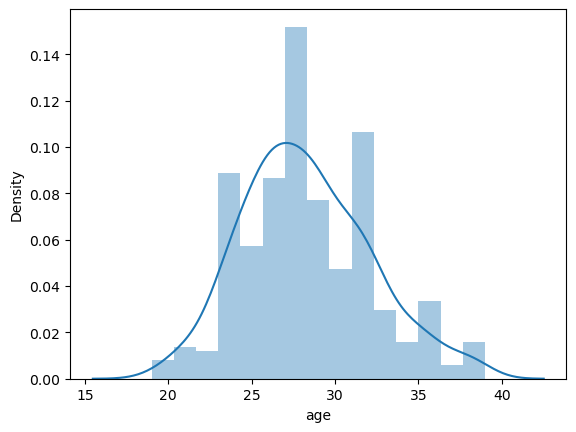

In [51]:
# Vamos sacando una foto. De la librería sns, aplicate ahí la gráfica distplot:
sns.distplot(dataf['age'])

##### Se observa que la mayoría de los jugadores están concentrados alrededor de los 25 a 30 años.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Paris Saint-Germain'),
  Text(1, 0, 'Liverpool'),
  Text(2, 0, 'Manchester City'),
  Text(3, 0, 'Bayern München'),
  Text(4, 0, 'Real Madrid'),
  Text(5, 0, 'Barcelona'),
  Text(6, 0, 'Atlético Madrid'),
  Text(7, 0, 'Manchester United'),
  Text(8, 0, 'Internazionale'),
  Text(9, 0, 'Arsenal')])

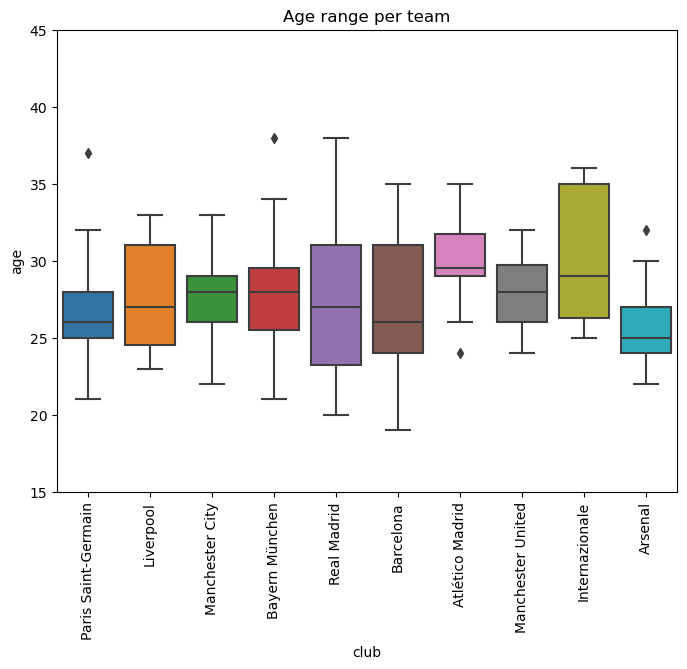

In [52]:
# Observemos como se distribuyen las edades en los 10 equipos con mas apariciones en el dataframe.

f, ax=plt.subplots(figsize=(8,6)) #definir el área del gráfico o pedazo de pantalla que reservo para la gráfica (de la librería matplotlib vas a agarrar subplots)
fig=sns.boxplot(x='club', y='age', data=dataf1)  # definir la propia gráfica
fig.axis(ymin=15, ymax=45) #modificando el atributo axis de la figura definida fig
plt.title('Age range per team')
plt.xticks(rotation=90)  #rotate ahí las etiquetas del eje x

<h5>El anterior gráfico boxplot reporta que:</h5>
<ul>  
<li>Los equipos cuyo espectro o rango de edades es mas compacto son el M. Utd el Atl. Madrid y el Arsenal</li>
<li>Los equipos con edades mas dispersas entre sus jugadores son el Real Madrid y el Barcelona.</li>
<li>Tenemos unos outliers en algunos clubes (PSG, Bayer M., Atl. Madrid y Arsenal)</li>
</ul>

In [53]:
# Comprobemos numéricamente la segunda observación. Sabemos que el dataframe dataf1 contiene información sobre esos 10 clubes. Hagamos una agrupación por club y hallemos
# la desviación estándar de la edad para cada club:
dataf1.groupby('club').std()['age']

club
Arsenal                2.804933
Atlético Madrid        2.765332
Barcelona              5.058631
Bayern München         4.233652
Internazionale         4.195759
Liverpool              3.521363
Manchester City        3.103603
Manchester United      2.730576
Paris Saint-Germain    3.631369
Real Madrid            5.329268
Name: age, dtype: float64

##### Efectivamente se observa que donde hay mas dispersión de los datos (desviación estándar más alta) es en los clubes Real Madrid y Barcelona.

#### Exploremos un poco el gráfico boxplot.

In [54]:
# Traigamos la columna edad del dataframe data1, pero solo para el equipo Bayern München
# Sintáxis:  dataf1[filtro].column

dataf1[dataf1['club']=='Bayern München'].age
# dataf1[dataf1['club']=='Bayern München']['age'] otra forma equivalente a la sintaxis anterior

3      30
28     29
40     38
55     28
80     34
88     21
99     27
100    28
114    29
127    23
140    27
142    24
143    25
275    30
418    26
Name: age, dtype: int64

In [55]:
# Hallemos los cuartiles de la lista de datos anterior:

# Filtro: dataf[dataf['club']=='Liverpool']

q75, q25 = np.percentile(dataf1[dataf1['club']=='Bayern München'].age, [75 ,25])
iqr = q75 - q25

#display interquartile range 
print("El percentil 25 es (o primer cuartil): ",q25, "; el percentil 75 es (o tercer cuartil): ", q75, " y el intercuartil es: ", iqr)

El percentil 25 es (o primer cuartil):  25.5 ; el percentil 75 es (o tercer cuartil):  29.5  y el intercuartil es:  4.0


<h5>En el gráfico boxplot vimos que algunos clubes tiene unos valores que se alejan de los demás. Se distancian bastante del grupo donde se concentran la mayoría de los datos.
Son datos que están fuera de rango y sobresalen de los demás. En la gráfica de boxplot, se identifican visualmente como aquellos puntos con forma de diamante.</h5>

<h5>Se conocen también como valores atípicos.</h5>

<h5>El método más sencillo para hallar los valores atípicos es el test de Tukey, que toma como referencia la diferencia entre el primer cuartil (Q1) y el tercer cuartil (Q3),
o rango intercuartílico (iqr). En un diagrama de caja se considera un valor atípico el que se encuentra 1,5 veces esa distancia de uno de esos cuartiles (atípico leve)
o a 3 veces esa distancia (atípico extremo).</h5>


In [56]:
# De acuerdo a lo anterior, hallemos cuáles son esos límites por fuera de los cuales se considera que un valor es atípico para el club Bayern:
print("Valores límite por fuera de los cuales se considera son valores outliers: ",q25-1.5*iqr, "y", q75+1.5*iqr)

Valores límite por fuera de los cuales se considera son valores outliers:  19.5 y 35.5


<h5>Ayudados con el gráfico bloxplot y la lista de las edades para el Bayern, vemos que el valor atípico es 38 años.
Pero, para el caso donde se tenga un conjunto de datos muy grande, ¿cómo hallar esto con una línea de código?</h5>

In [57]:
##Primero, traigamos la columna edad para el equipo Bayern:
dataBM=dataf1[dataf1['club']=='Bayern München'].age
dataBM

3      30
28     29
40     38
55     28
80     34
88     21
99     27
100    28
114    29
127    23
140    27
142    24
143    25
275    30
418    26
Name: age, dtype: int64

In [58]:
## Como lo anterior es una serie, podemos acceder a los objetos que contienen los índices y los valores a través de los atributos index y values de la serie.
## En este caso necesitamos son los valores
dataBM.values

array([30, 29, 38, 28, 34, 21, 27, 28, 29, 23, 27, 24, 25, 30, 26],
      dtype=int64)

In [59]:
# Hallemos ahora los valores lejanos con un filtro y con la teoría ya explicada, es decir, los valores que están 1,5 la distancia intercuartil de los cuartiles Q1 y Q3
outliers = dataBM[(dataBM.values <(q25-1.5*iqr)) | (dataBM.values>(q75+1.5*iqr))]
outliers

40    38
Name: age, dtype: int64

<h5>Efectivamente acabamos de comprobar que la edad considerada más alejada del grupo de datos es 38 años.
Nos informa además que corresponde al registro con índice número 40. Si quisiéramos saber todos los datos de ese registro con índice número 40,
 es decir, quién es ese jugador, y demás atributos, ejecutamos lo siguiente:</h5>

In [60]:
# Primero, guardamos en un dataframe todas la filas donde aparece el equipo Bayern (es decir, hacemos un filtrado):
dataBM1=dataf1[dataf1['club']=='Bayern München']
dataBM1

,name,club,position,height,foot,age
3,Harry Kane,Bayern München,Attacking Midfielder Centre,188,Right,30
28,Joshua Kimmich,Bayern München,Defender Right,176,Right,29
40,Manuel Neuer,Bayern München,Goalkeeper,193,Both,38
55,Leroy Sanè,Bayern München,Attacking Midfielder Right Left Centre,184,Left,28
80,Thomas Müller,Bayern München,Attacking Midfielder Right Centre,186,Right,34
88,Jamal Musiala,Bayern München,Midfielder Centre,183,Right,21
99,Kingsley Coman,Bayern München,Midfielder Right Left,178,Right,27
100,Serge Gnabry,Bayern München,Attacking Midfielder Right Left Centre,173,Right,28
114,Leon Goretzka,Bayern München,Defensive Midfielder Centre,189,Right,29
127,Alphonso Davies,Bayern München,Defender Left,181,Left,23


In [61]:
out = dataBM1[(dataBM1['age']<(q25-1.5*iqr)) | (dataBM1['age']>(q75+1.5*iqr))]
out

,name,club,position,height,foot,age
40,Manuel Neuer,Bayern München,Goalkeeper,193,Both,38


C:\Users\Ivan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='height', ylabel='Density'>

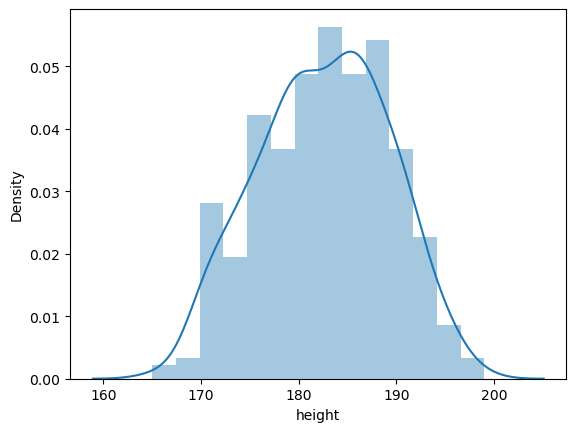

In [62]:
#¿Cómo están distribuidas las alturas de los jugadores?
sns.distplot(dataf['height'])

In [63]:
# Llevemos lo anterior a un histograma:

count, bin_edges = np.histogram(dataf1.height)
print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[ 6 13 17 33 20 22 24 11  9  2]
[169. 172. 175. 178. 181. 184. 187. 190. 193. 196. 199.]


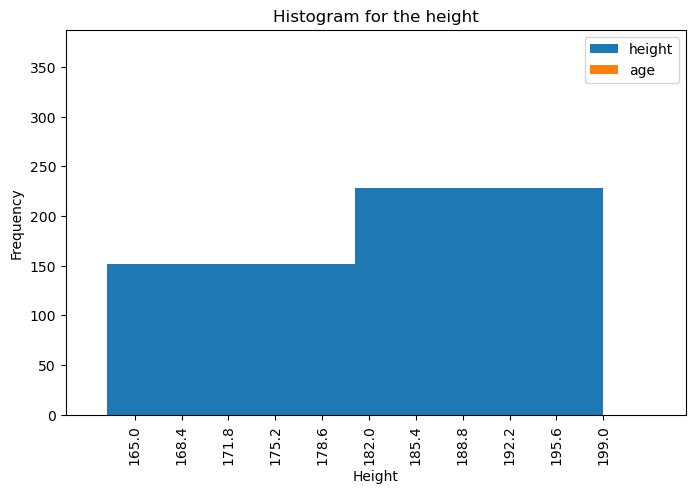

In [64]:
# Ejecutemos la propia gráfica:
count, bin_edges = np.histogram(dataf.height)
dataf.plot.hist(figsize=(8, 5), xticks= bin_edges)
plt.title('Histogram for the height') # add a title to the histogram
plt.ylabel('Frequency') # add y-label
plt.xlabel('Height') # add x-label
plt.ticklabel_format(style='plain', axis='both', scilimits=(0,0))
plt.xlim([160, 205])
plt.xticks(rotation=90)
plt.show()

In [65]:
# Traigamos un conteo que ya hicimos varias varias varias líneas arriba (línea de código 35 o algo así):
dataf['foot'].value_counts()

Right    250
Left      95
Both      35
Name: foot, dtype: int64

Text(0.5, 1.0, 'Type of skill')

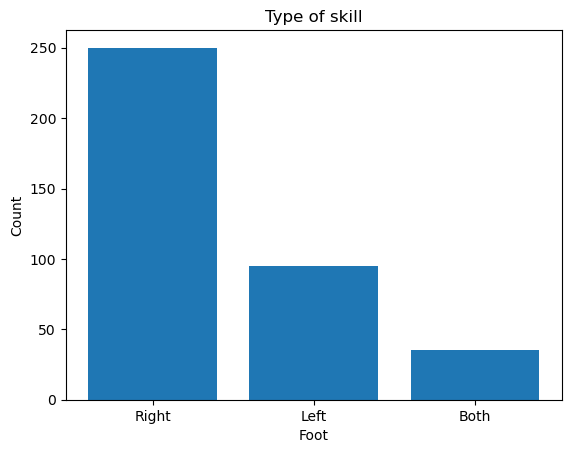

In [66]:
# Grafiquemos ello:

group = ['Right', 'Left', 'Both']
plt.bar(group, dataf['foot'].value_counts()) 
plt.xlabel("Foot")
plt.ylabel("Count")
plt.title("Type of skill")

Text(0, 0.5, 'Count')

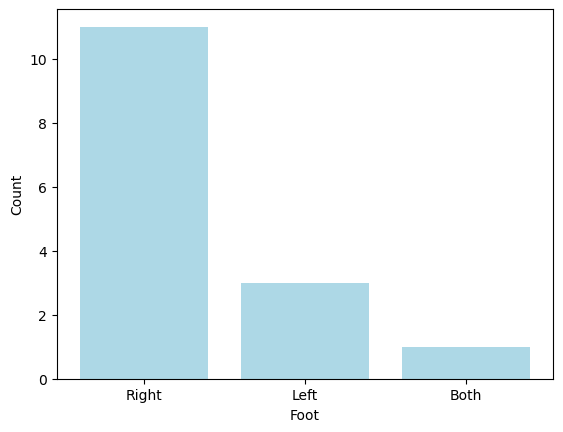

In [67]:
# ¿Y si quisiera hacer lo anterior para un club en específico? Breve. Píllala...
group = ['Right', 'Left', 'Both']
plt.bar(group, dataf1[dataf1['club']=='Bayern München'].foot.value_counts(), color='lightblue') #---------------ACÁ SE HA HECHO UN FILTRO BACANO-----------------------------#
plt.xlabel("Foot")
plt.ylabel("Count")
##plt.title("")

In [68]:
# El mismo anterior, solo para obtener el conteo mediante lista y no gráfico:
dataf1[dataf1['club']=='Bayern München'].foot.value_counts()

Right    11
Left      3
Both      1
Name: foot, dtype: int64

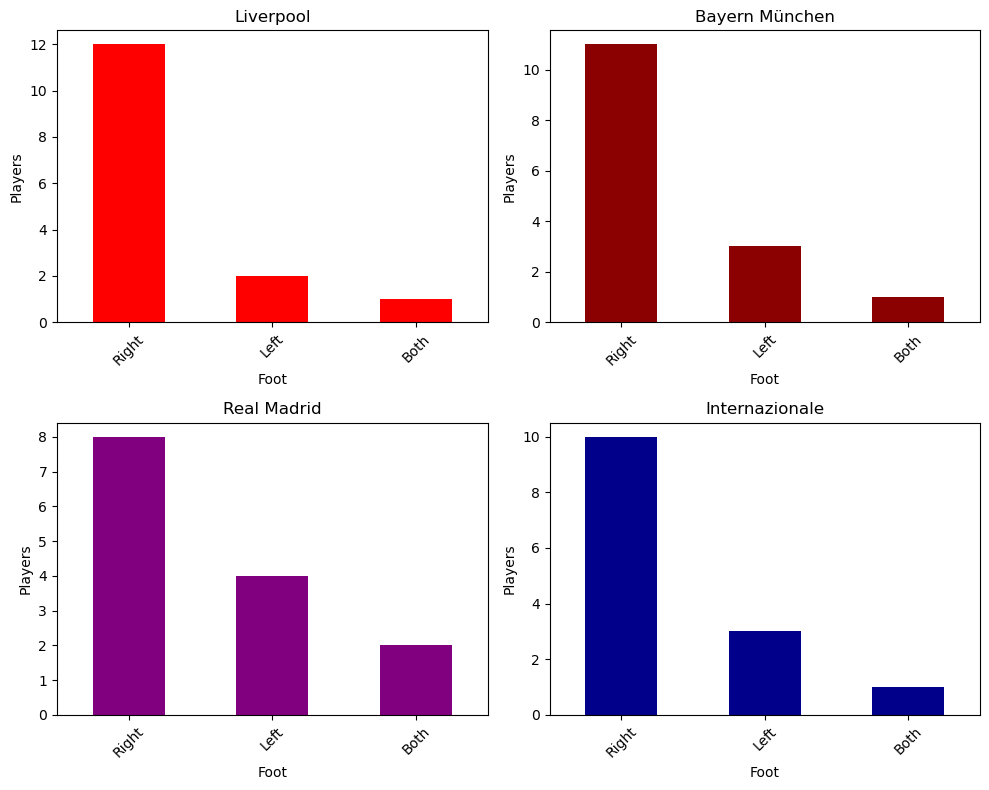

In [69]:
## Grafiquemos lo anterior pero para vrios equipos.

fig = plt.figure() # create figure

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (1 row, 1 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 2 (2 row, 1 columns, second plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 2 (2 row, 2 columns, second plot) 

#xlabels = ['Right', 'Left', 'Both']
# Subplot 1: Box plot
dataf1[dataf1['club']=='Liverpool'].foot.value_counts().plot(kind='bar', color='red', figsize=(10, 8), ax=ax0) # add to subplot 1
ax0.set_title('Liverpool')
ax0.set_ylabel('Players')
ax0.set_xlabel('Foot')
ax0.tick_params(axis='x', rotation=45)
#ax0.set_xticklabels(xlabels, rotation=0)

# Subplot 2: Bar plot
dataf1[dataf1['club']=='Bayern München'].foot.value_counts().plot(kind='bar', color='darkred', figsize=(10, 8), ax=ax1) # add to subplot 2
ax1.set_title('Bayern München')
ax1.set_ylabel('Players')
ax1.set_xlabel('Foot')
ax1.tick_params(axis='x', rotation=45)
#ax1.set_xticklabels(xlabels, rotation=0)

# Subplot 3: Bar plot
dataf1[dataf1['club']=='Real Madrid'].foot.value_counts().plot(kind='bar', color='purple', figsize=(10, 8), ax=ax2) # add to subplot 2
ax2.set_title('Real Madrid')
ax2.set_ylabel('Players')
ax2.set_xlabel('Foot')
ax2.tick_params(axis='x', rotation=45)
#ax2.set_xticklabels(xlabels, rotation=0)

# Subplot 2: Bar plot
dataf1[dataf1['club']=='Internazionale'].foot.value_counts().plot(kind='bar', color='darkblue', figsize=(10, 8), ax=ax3) # add to subplot 2
ax3.set_title('Internazionale')
ax3.set_ylabel('Players')
ax3.set_xlabel('Foot')
ax3.tick_params(axis='x', rotation=45)
#ax3.set_xticklabels(xlabels, rotation=0)

fig.tight_layout()
plt.show()

## Author
<a href="https://www.linkedin.com/in/iv%C3%A1n-pinilla-%C3%A1vila-21bb45121/" target="_blank"><font size = 4>Iván P. </a>